# libraries

In [108]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
import pickle

# getting data

In [7]:
with zipfile.ZipFile("/gh/kaggle-pg-3x24/data/playground-series-s3e24.zip") as z:
    with z.open("sample_submission.csv") as f:
        sample_submission = pd.read_csv(f)
    with z.open("test.csv") as f:
        test = pd.read_csv(f)
    with z.open("train.csv") as f:
        train = pd.read_csv(f)

# exploring data

In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       106171 non-null  int64  
 1   smoking  106171 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.6 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [44]:
# There are no null values

In [12]:
train["smoking"].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

In [13]:
sample_submission["smoking"].value_counts()

smoking
0.5    106171
Name: count, dtype: int64

## splitting data

In [15]:
strat_train_set, strat_test_set = train_test_split(
    train, test_size=0.2, stratify=train["smoking"], random_state=42)

In [17]:
strat_train_set["smoking"].value_counts()

smoking
0    71682
1    55722
Name: count, dtype: int64

In [55]:
strat_train_set.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.00000,127404.000000,127404.000000,127404.000000,...,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000,127404.000000
mean,79708.841457,44.320948,165.259215,67.152444,83.005628,1.005981,1.00113,1.023932,1.023367,122.521043,...,55.832996,114.620703,14.794259,1.074166,0.892405,25.538437,26.589401,36.205362,0.198620,0.437365
std,45933.190593,11.838286,8.814998,12.585946,8.953774,0.405914,0.39309,0.152837,0.151066,12.724393,...,13.949353,27.873837,1.431138,0.347743,0.178769,9.638768,18.337933,31.210891,0.398963,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.10000,1.000000,1.000000,79.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39971.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.80000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79653.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.00000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.20000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,125.800000,9.900000,9.90000,2.000000,2.000000,203.000000,...,135.000000,1660.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


## correlation

In [19]:
corr_matrix = strat_train_set.corr()

In [20]:
corr_matrix["smoking"].sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.453211
height(cm)             0.448759
weight(kg)             0.353012
triglyceride           0.332402
Gtp                    0.305361
serum creatinine       0.276575
waist(cm)              0.262829
ALT                    0.158994
relaxation             0.110460
eyesight(right)        0.110413
dental caries          0.109163
eyesight(left)         0.100306
fasting blood sugar    0.097196
AST                    0.058268
systolic               0.057741
id                    -0.001325
Urine protein         -0.028423
hearing(right)        -0.035930
hearing(left)         -0.037738
Cholesterol           -0.052624
LDL                   -0.072529
age                   -0.207806
HDL                   -0.272884
Name: smoking, dtype: float64

In [24]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [28]:
corr_matrix["abs_smoking"] = corr_matrix["smoking"].abs()

In [29]:
corr_matrix["abs_smoking"].sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.453211
height(cm)             0.448759
weight(kg)             0.353012
triglyceride           0.332402
Gtp                    0.305361
serum creatinine       0.276575
HDL                    0.272884
waist(cm)              0.262829
age                    0.207806
ALT                    0.158994
relaxation             0.110460
eyesight(right)        0.110413
dental caries          0.109163
eyesight(left)         0.100306
fasting blood sugar    0.097196
LDL                    0.072529
AST                    0.058268
systolic               0.057741
Cholesterol            0.052624
hearing(left)          0.037738
hearing(right)         0.035930
Urine protein          0.028423
id                     0.001325
Name: abs_smoking, dtype: float64

In [30]:
corr_matrix["abs_smoking"].sort_values(ascending=False).describe()

count    24.000000
mean      0.205998
std       0.216624
min       0.001325
25%       0.058136
50%       0.110437
75%       0.283772
max       1.000000
Name: abs_smoking, dtype: float64

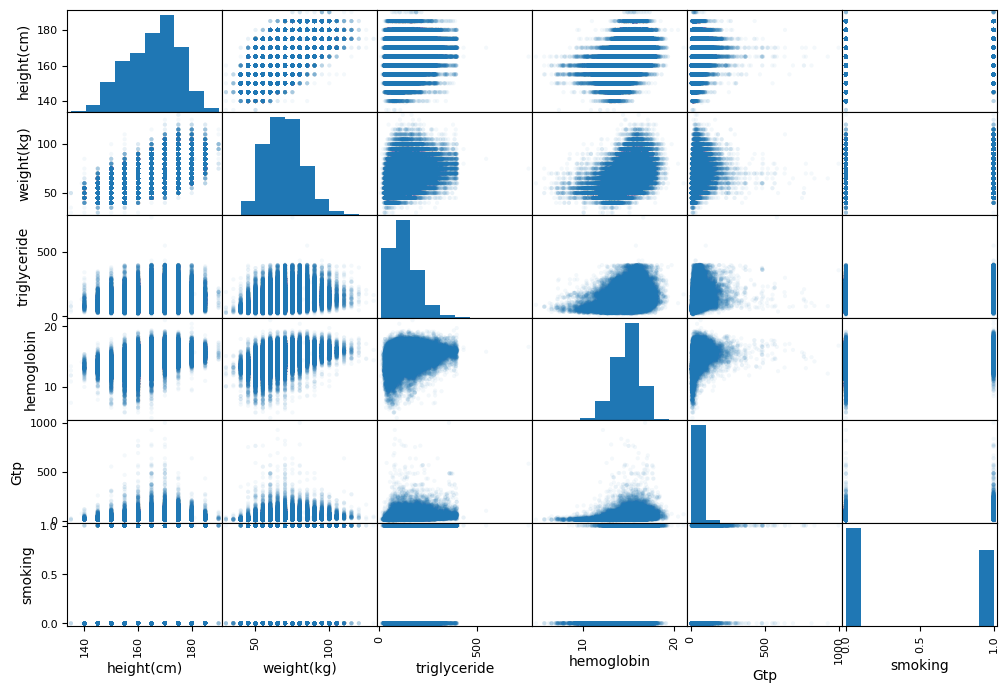

In [43]:
attributes = list(corr_matrix[(corr_matrix["abs_smoking"]>0.3)]["smoking"].index)
scatter_matrix(strat_train_set[attributes], figsize=(12, 8), alpha=0.05)
plt.show()

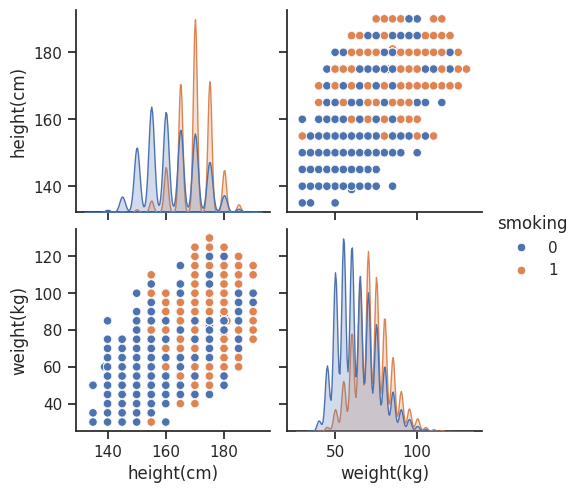

In [49]:
sns.set_theme(style="ticks")

sns.pairplot(strat_train_set[["height(cm)","weight(kg)","smoking"]], hue="smoking")

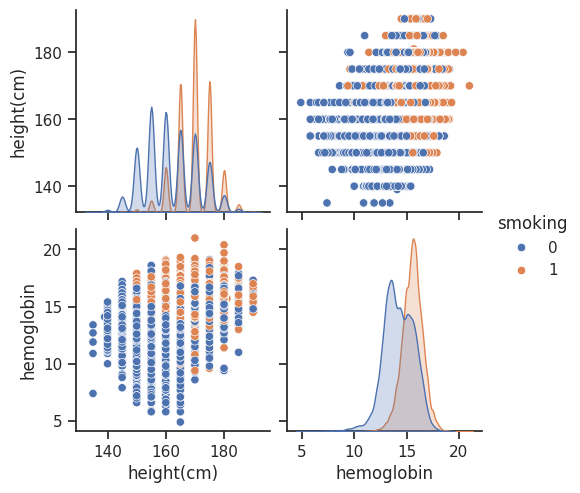

In [51]:


sns.pairplot(strat_train_set[["height(cm)","hemoglobin","smoking"]], hue="smoking")

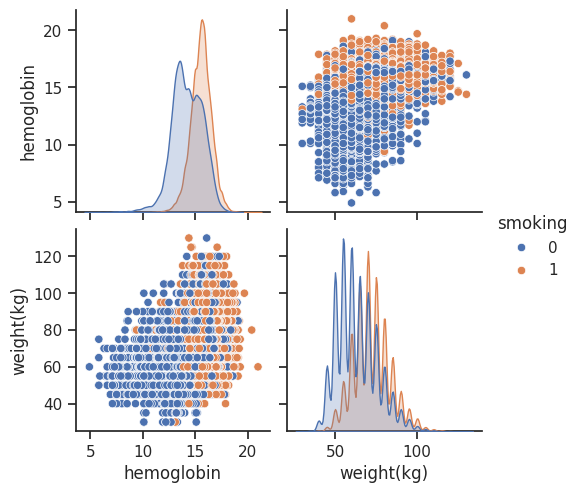

In [54]:

sns.pairplot(strat_train_set[["hemoglobin","weight(kg)","smoking"]], hue="smoking")

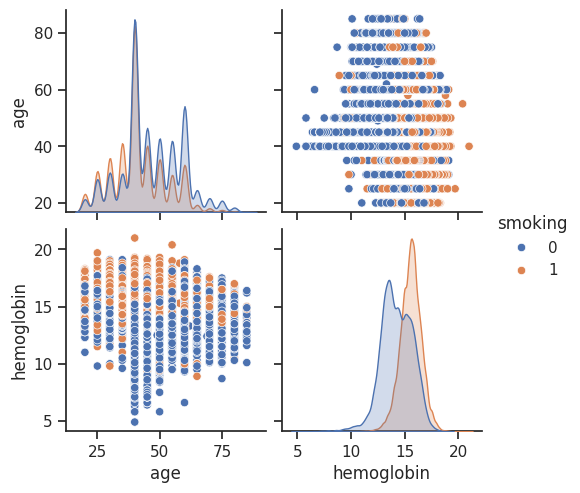

In [56]:


sns.pairplot(strat_train_set[["age","hemoglobin","smoking"]], hue="smoking")

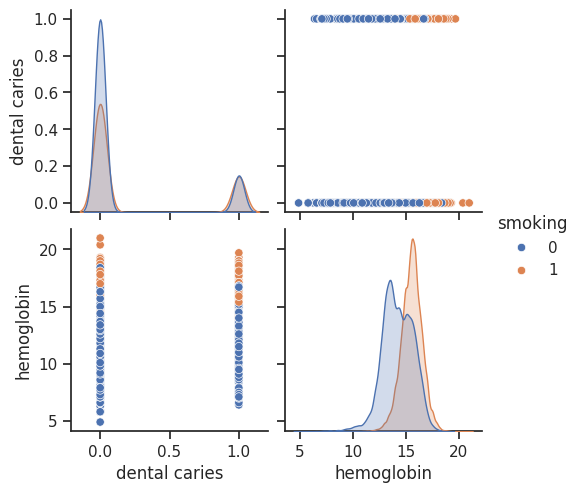

In [57]:


sns.pairplot(strat_train_set[["dental caries","hemoglobin","smoking"]], hue="smoking")

# Training the model

In [60]:
attributes = ["hemoglobin","weight(kg)","age","dental caries"]

In [61]:
rnd_clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=3,
                                 n_jobs=-1, random_state=42)

## Cross validation

In [66]:
rf_roc_auc = cross_val_score(rnd_clf, strat_train_set[attributes], strat_train_set["smoking"],
                              scoring="roc_auc", cv=10)

In [67]:
rf_roc_auc

array([0.75314765, 0.75345464, 0.75720681, 0.74807873, 0.74781428,
       0.75456405, 0.75046925, 0.73729322, 0.75172734, 0.73519518])

In [68]:
rf_roc_auc.mean()

0.7488951148871762

In [71]:
rnd_clf.fit(strat_train_set[attributes],strat_train_set["smoking"])

RandomForestClassifier(max_leaf_nodes=3, n_estimators=5, n_jobs=-1,
                       random_state=42)

In [73]:
y_pred_rf = rnd_clf.predict(strat_test_set[attributes])

## test score

In [76]:
test_score = roc_auc_score(strat_test_set["smoking"],y_pred_rf)

In [77]:
test_score

0.7023369873306926

In [79]:
dicts = strat_train_set[attributes].to_dict(orient='records')

In [81]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [82]:
(X_train==strat_train_set[attributes].values).all(axis=None)

False

In [85]:
X_train.shape

(127404, 4)

In [86]:
strat_train_set[attributes].values.shape

(127404, 4)

In [87]:
X_train

array([[45. ,  0. , 16.7, 75. ],
       [35. ,  0. , 15.6, 85. ],
       [45. ,  0. , 13.5, 70. ],
       ...,
       [55. ,  0. , 16.3, 75. ],
       [60. ,  0. , 13. , 65. ],
       [50. ,  0. , 13.4, 75. ]])

In [88]:
strat_train_set[attributes].values

array([[16.7, 75. , 45. ,  0. ],
       [15.6, 85. , 35. ,  0. ],
       [13.5, 70. , 45. ,  0. ],
       ...,
       [16.3, 75. , 55. ,  0. ],
       [13. , 65. , 60. ,  0. ],
       [13.4, 75. , 50. ,  0. ]])

In [89]:
dicts = strat_test_set[attributes].to_dict(orient='records')
X = dv.transform(dicts)

In [90]:
strat_test_set[attributes].values

array([[13.8, 65. , 40. ,  1. ],
       [17.1, 65. , 45. ,  0. ],
       [12.9, 55. , 50. ,  0. ],
       ...,
       [16.4, 90. , 50. ,  0. ],
       [15.7, 55. , 60. ,  0. ],
       [13.9, 45. , 40. ,  0. ]])

In [91]:
X

array([[40. ,  1. , 13.8, 65. ],
       [45. ,  0. , 17.1, 65. ],
       [50. ,  0. , 12.9, 55. ],
       ...,
       [50. ,  0. , 16.4, 90. ],
       [60. ,  0. , 15.7, 55. ],
       [40. ,  0. , 13.9, 45. ]])

In [93]:
def train(df_train, y_train):
    dicts = df_train[attributes].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(n_estimators=5, max_leaf_nodes=3,
                                 n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    
    return dv, model

In [102]:
def predict(df, dv, model):
    dicts = df[attributes].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred_proba = model.predict_proba(X)
    y_pred = y_pred_proba[:, 1]
    y_pred_class = model.predict(X)

    return y_pred, y_pred_proba, y_pred_class

In [94]:
y_train = strat_train_set["smoking"]

In [95]:
dv2,model2 = train(strat_train_set, y_train)

In [103]:
y_pred, ypredproba,ypredprobaclass = predict(strat_test_set,dv2,model2)

In [104]:
y_pred, ypredproba,ypredprobaclass

(array([0.26213235, 0.62021456, 0.1333122 , ..., 0.62021456, 0.53304181,
        0.1333122 ]),
 array([[0.73786765, 0.26213235],
        [0.37978544, 0.62021456],
        [0.8666878 , 0.1333122 ],
        ...,
        [0.37978544, 0.62021456],
        [0.46695819, 0.53304181],
        [0.8666878 , 0.1333122 ]]),
 array([0, 1, 0, ..., 1, 1, 0]))

In [97]:
test_score = roc_auc_score(strat_test_set["smoking"],y_pred)
test_score

0.7535073567662117

In [98]:
y_pred

array([0.26213235, 0.62021456, 0.1333122 , ..., 0.62021456, 0.53304181,
       0.1333122 ])

In [99]:
y_pred_rf

array([0, 1, 0, ..., 1, 0, 0])

In [100]:
ypred3 = rnd_clf.predict_proba(strat_test_set[attributes])

In [101]:
ypred3

array([[0.50108461, 0.49891539],
       [0.43697388, 0.56302612],
       [0.81155952, 0.18844048],
       ...,
       [0.43697388, 0.56302612],
       [0.52836204, 0.47163796],
       [0.81155952, 0.18844048]])

In [105]:
test_score = roc_auc_score(strat_test_set["smoking"],ypredprobaclass)
test_score

0.7178728945686463

# Saving model trained

In [110]:
outputfile = "model1.bin"

In [111]:
with open(outputfile,"wb") as f_out:
    pickle.dump((dv,model2),f_out)